In [1]:
import pandas as pd
from sklearn import linear_model, model_selection, pipeline, tree, feature_selection
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv("cmu-sleep.csv").replace(" ", None)
df

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,24.160000,3.000000,3.380000,73,4.055294859
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,13.137931,3.660000,2.600000,64,2.482534122
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,14.956522,3.570000,3.070000,63,2.30778293
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,54.551724,3.610000,3.560000,61,1.958280544
4,174,5,lac1,1,1,0,0.130181,423.421053,368.763158,0.655172,10.526316,3.210000,4.000000,61,1.958280544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,44.344828,3.722167,3.611333,None,None
630,61,2,uw1,0,1,None,0.045369,477.894737,331.315789,0.678571,23.631579,3.868182,3.650000,10,-1.80457982
631,172,2,uw1,1,1,None,0.075429,407.153846,387.269231,0.928571,12.384615,3.727272,3.600000,15,0.373361342
632,110,2,uw1,1,0,None,0.200289,397.125000,487.583333,0.857143,99.541667,3.337500,3.538461,13,-0.497815123


In [3]:
df.isna().sum()

subject_id                 0
study                      0
cohort                     0
demo_race                  1
demo_gender                3
demo_firstgen              4
bedtime_mssd               0
TotalSleepTime             0
midpoint_sleep             0
frac_nights_with_data      0
daytime_sleep              0
cum_gpa                    0
term_gpa                   0
term_units               147
Zterm_units_ZofZ         147
dtype: int64

In [4]:
df["diff_gpa"] = df["cum_gpa"] - df["term_gpa"]
df

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ,diff_gpa
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,24.160000,3.000000,3.380000,73,4.055294859,-0.380000
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,13.137931,3.660000,2.600000,64,2.482534122,1.060000
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,14.956522,3.570000,3.070000,63,2.30778293,0.500000
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,54.551724,3.610000,3.560000,61,1.958280544,0.050000
4,174,5,lac1,1,1,0,0.130181,423.421053,368.763158,0.655172,10.526316,3.210000,4.000000,61,1.958280544,-0.790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,44.344828,3.722167,3.611333,None,None,0.110833
630,61,2,uw1,0,1,None,0.045369,477.894737,331.315789,0.678571,23.631579,3.868182,3.650000,10,-1.80457982,0.218182
631,172,2,uw1,1,1,None,0.075429,407.153846,387.269231,0.928571,12.384615,3.727272,3.600000,15,0.373361342,0.127272
632,110,2,uw1,1,0,None,0.200289,397.125000,487.583333,0.857143,99.541667,3.337500,3.538461,13,-0.497815123,-0.200961


In [5]:
df_clean = df[df["frac_nights_with_data"] >= 5/7]
df_clean

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ,diff_gpa
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,24.160000,3.000000,3.380000,73,4.055294859,-0.380000
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,13.137931,3.660000,2.600000,64,2.482534122,1.060000
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,14.956522,3.570000,3.070000,63,2.30778293,0.500000
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,54.551724,3.610000,3.560000,61,1.958280544,0.050000
5,184,5,lac1,1,1,0,0.209483,397.400000,353.580000,0.862069,22.360000,3.200000,3.360000,60,1.783529351,-0.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,99733,4,nh,1,1,0,0.285439,324.333333,344.814815,0.900000,41.629630,3.333500,3.222167,None,None,0.111333
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,44.344828,3.722167,3.611333,None,None,0.110833
631,172,2,uw1,1,1,None,0.075429,407.153846,387.269231,0.928571,12.384615,3.727272,3.600000,15,0.373361342,0.127272
632,110,2,uw1,1,0,None,0.200289,397.125000,487.583333,0.857143,99.541667,3.337500,3.538461,13,-0.497815123,-0.200961


In [6]:
df_cmu = df[(df["study"] == 1) | (df["study"] == 5)]
df_cmu

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ,diff_gpa
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,24.160000,3.00,3.38,73,4.055294859,-0.38
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,13.137931,3.66,2.60,64,2.482534122,1.06
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,14.956522,3.57,3.07,63,2.30778293,0.50
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,54.551724,3.61,3.56,61,1.958280544,0.05
4,174,5,lac1,1,1,0,0.130181,423.421053,368.763158,0.655172,10.526316,3.21,4.00,61,1.958280544,-0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,613,1,lac2,1,0,0,0.183344,388.409091,398.931818,0.758621,44.181818,4.00,4.00,54,1.304600178,0.00
417,631,1,lac2,1,0,0,0.781137,428.500000,477.857143,0.965517,32.607143,2.36,2.79,47,-0.365659907,-0.43
418,662,1,lac2,0,0,0,0.489206,457.370370,535.444444,0.931034,30.925926,1.70,2.47,43,-1.320094242,-0.77
419,665,1,lac2,1,0,0,0.103652,405.384615,442.730769,0.896552,40.076923,3.52,3.57,51,0.588774427,-0.05


In [7]:
df_uw = df[(df["study"] == 2) | (df["study"] == 3)]
df_uw

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ,diff_gpa
131,538,3,uw2,1,0,2,0.032421,402.964286,294.803571,1.000000,23.392857,3.552759,3.270000,18,1.603330987,0.282759
134,2,2,uw1,1,1,1,0.422244,587.666667,380.333333,0.214286,64.500000,3.321428,3.833333,18,1.680126039,-0.511905
135,6,2,uw1,1,1,1,0.138198,406.884615,358.865385,0.928571,39.384615,3.426666,3.476923,13,-0.497815123,-0.050257
136,19,2,uw1,1,1,1,0.092674,411.266667,349.533333,0.535714,27.333333,3.265517,3.100000,15,0.373361342,0.165517
137,32,2,uw1,1,1,1,0.062151,405.214286,363.250000,1.000000,39.571429,3.180000,3.500000,10,-1.80457982,-0.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,561,3,uw2,1,0,0,0.168621,445.269231,382.557692,0.928571,25.153846,3.535312,2.970000,15,0.041207105,0.565312
491,569,3,uw2,1,0,0,0.057353,388.000000,321.650000,0.357143,41.100000,3.162500,3.710000,19,2.124038948,-0.547500
630,61,2,uw1,0,1,None,0.045369,477.894737,331.315789,0.678571,23.631579,3.868182,3.650000,10,-1.80457982,0.218182
631,172,2,uw1,1,1,None,0.075429,407.153846,387.269231,0.928571,12.384615,3.727272,3.600000,15,0.373361342,0.127272


In [8]:
df_nd = df[df["study"] == 4]
df_nd

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ,diff_gpa
215,14847,4,nh,1,1,1,0.131813,456.566667,385.433333,1.000000,51.033333,3.333167,3.666833,None,None,-0.333667
216,17020,4,nh,0,0,1,0.209352,429.607143,425.339286,0.933333,59.678571,3.166667,3.500000,None,None,-0.333333
217,18707,4,nh,1,1,1,0.052274,419.900000,310.900000,1.000000,57.000000,2.933400,3.277833,None,None,-0.344433
218,51723,4,nh,1,0,1,0.265969,273.916667,455.750000,0.800000,30.500000,2.800200,3.466800,None,None,-0.666600
219,72885,4,nh,1,0,1,0.083406,356.833333,414.416667,1.000000,45.766667,3.333400,3.266600,None,None,0.066800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,98462,4,nh,1,0,0,0.238077,360.760000,389.420000,0.833333,65.360000,3.389000,3.388833,None,None,0.000167
627,98700,4,nh,1,1,0,0.127927,427.551724,314.500000,0.966667,34.517241,3.833500,3.722167,None,None,0.111333
628,99733,4,nh,1,1,0,0.285439,324.333333,344.814815,0.900000,41.629630,3.333500,3.222167,None,None,0.111333
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,44.344828,3.722167,3.611333,None,None,0.110833


In [9]:
regression_1 = smf.ols("term_gpa ~ bedtime_mssd + TotalSleepTime + midpoint_sleep + daytime_sleep + cum_gpa", data = df).fit()
regression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               term_gpa   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     93.36
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           1.90e-73
Time:                        15:14:55   Log-Likelihood:                -284.05
No. Observations:                 634   AIC:                             580.1
Df Residuals:                     628   BIC:                             606.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6953      0.237      2.932      0.003       0.230       1.161
bedtime_mssd       0.0003      0.012      0.027      0.978      -0.023       0.024
TotalSleepTime     0.0011      0.000      3.393      0.001       0.000       0.002
midpoint_sleep    -0.0003      0.000     -1.049      0.295      -0.001       0.000
daytime_sleep     -0.0005      0.001     -0.901      0.368      -0.002       0.001
cum_gpa            0.7026      0.036     19.704      0.000       0.633       0.773
==============================================================================
Omnibus:                      167.100   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.917
Skew:                          -1.274   Prob(JB):                    1.52e-107
Kurtosis:                       6.482   Cond. No.                     8.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
regression_cmu1 = smf.ols("term_gpa ~ bedtime_mssd + TotalSleepTime + midpoint_sleep + daytime_sleep", data = df_cmu).fit()
regression_cmu1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               term_gpa   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     4.905
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           0.000852
Time:                        15:14:55   Log-Likelihood:                -164.03
No. Observations:                 208   AIC:                             338.1
Df Residuals:                     203   BIC:                             354.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.6087      0.477      7.565      0.000       2.668       4.549
bedtime_mssd      -0.1193      0.072     -1.669      0.097      -0.260       0.022
TotalSleepTime     0.0008      0.001      0.986      0.325      -0.001       0.002
midpoint_sleep    -0.0012      0.001     -1.889      0.060      -0.002    5.12e-05
daytime_sleep     -0.0009      0.002     -0.563      0.574      -0.004       0.002
==============================================================================
Omnibus:                       37.077   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.666
Skew:                          -1.085   Prob(JB):                     6.04e-12
Kurtosis:                       4.118   Cond. No.                     7.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
regression_uw1 = smf.ols("term_gpa ~ bedtime_mssd + TotalSleepTime + midpoint_sleep + daytime_sleep", data = df_uw).fit()
regression_uw1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               term_gpa   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     9.094
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           6.53e-07
Time:                        15:14:55   Log-Likelihood:                -193.99
No. Observations:                 279   AIC:                             398.0
Df Residuals:                     274   BIC:                             416.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.8218      0.372      7.580      0.000       2.089       3.555
bedtime_mssd       0.0209      0.018      1.146      0.253      -0.015       0.057
TotalSleepTime     0.0021      0.001      3.160      0.002       0.001       0.003
midpoint_sleep    -0.0004      0.000     -0.756      0.450      -0.001       0.001
daytime_sleep     -0.0036      0.001     -3.150      0.002      -0.006      -0.001
==============================================================================
Omnibus:                       96.027   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.956
Skew:                          -1.477   Prob(JB):                     7.43e-71
Kurtosis:                       7.365   Cond. No.                     7.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
regression_nd1 = smf.ols("term_gpa ~ bedtime_mssd + TotalSleepTime + midpoint_sleep + daytime_sleep", data = df_nd).fit()
regression_nd1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               term_gpa   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     5.480
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           0.000393
Time:                        15:14:55   Log-Likelihood:                -2.9105
No. Observations:                 147   AIC:                             15.82
Df Residuals:                     142   BIC:                             30.77
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5602      0.280     12.719      0.000       3.007       4.114
bedtime_mssd       0.0255      0.019      1.365      0.174      -0.011       0.062
TotalSleepTime     0.0013      0.000      2.847      0.005       0.000       0.002
midpoint_sleep    -0.0010      0.000     -2.302      0.023      -0.002      -0.000
daytime_sleep     -0.0004      0.001     -0.482      0.630      -0.002       0.001
==============================================================================
Omnibus:                       15.450   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.970
Skew:                          -0.769   Prob(JB):                     0.000207
Kurtosis:                       3.638   Cond. No.                     7.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
regression2 = smf.ols("term_gpa ~ bedtime_mssd + TotalSleepTime + midpoint_sleep + daytime_sleep + demo_gender", data = df).fit()
regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               term_gpa   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     10.16
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           2.28e-09
Time:                        15:14:55   Log-Likelihood:                -434.00
No. Observations:                 631   AIC:                             880.0
Df Residuals:                     625   BIC:                             906.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.5138      0.244     14.397      0.000       3.035       3.993
demo_gender[T.1]    -0.0298      0.039     -0.758      0.449      -0.107       0.047
bedtime_mssd         0.0216      0.015      1.427      0.154      -0.008       0.051
TotalSleepTime       0.0013      0.000      3.000      0.003       0.000       0.002
midpoint_sleep      -0.0012      0.000     -3.890      0.000      -0.002      -0.001
daytime_sleep       -0.0020      0.001     -2.692      0.007      -0.003      -0.001
==============================================================================
Omnibus:                      194.838   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.228
Skew:                          -1.505   Prob(JB):                    3.35e-125
Kurtosis:                       6.570   Cond. No.                     7.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
features = ["bedtime_mssd", "TotalSleepTime", "midpoint_sleep", "daytime_sleep"]
features_night = ["bedtime_mssd", "TotalSleepTime", "midpoint_sleep"]

## Tree Based Linear Regression

Decision tree model

features = bedtime mssd, total sleep time, midpoint sleep, and day time sleep

In [15]:
# Set up cross-validation; make sure to shuffle folds
xval1 = model_selection.KFold(10, shuffle=True)

# Train and test model
model1 = tree.DecisionTreeRegressor(min_samples_leaf = 5)

features = ["TotalSleepTime", "midpoint_sleep", "daytime_sleep", "cum_gpa"]

X1 = df_clean[features]
y1 = df_clean["term_gpa"]

result1 = model_selection.cross_validate(model1, X1, y1, cv = xval1, scoring = "r2", return_train_score = True, return_estimator = True)

# Calculate mean R^2 for training and testing data
train_r2_1 = result1['train_score'].mean()
test_r2_1 = result1['test_score'].mean()

In [16]:
print(train_r2_1)
print(test_r2_1)

0.6741143037911442
0.10259644644190662


## Decision tree model

features = bedtime mssd, total sleep time, and midpoint sleep

In [17]:
# Set up cross-validation; make sure to shuffle folds
xval2 = model_selection.KFold(10, shuffle=True)

# Train and test model
model2 = tree.DecisionTreeRegressor(min_samples_leaf = 5)

X2 = df_clean[features_night]
y2 = df_clean["term_gpa"]

result2 = model_selection.cross_validate(model2, X2, y2, cv = xval2, scoring = "r2", return_train_score = True, return_estimator = True)

# Calculate mean R^2 for training and testing data
train_r2_2 = result2['train_score'].mean()
test_r2_2 = result2['test_score'].mean()

In [18]:
print(train_r2_2)
print(test_r2_2)

0.452364317401579
-0.5188597199362606


## Linear Regression
["TotalSleepTime", "midpoint_sleep", "daytime_sleep", "cum_gpa"]

In [19]:
# Set up cross-validation
xval3 = model_selection.KFold(10, shuffle=True)

# Train and test model
model3 = linear_model.LinearRegression()

X3 = df_clean[features]
y3 = df_clean["term_gpa"]

results3 = model_selection.cross_validate(model3, X3, y3, scoring='r2', cv=xval3, return_train_score=True)

# Calculate mean R^2 for training and testing data
train_r2_3 = results3['train_score'].mean()
test_r2_3 = results3['test_score'].mean()

In [20]:
print(train_r2_3)
print(test_r2_3)

0.4481105900246044
0.3739331776145241


In [21]:
# Set up cross-validation
xval_cmu = model_selection.KFold(10, shuffle=True)

# Train and test model
model_cmu = linear_model.LinearRegression()

X_cmu = df_cmu[features]
y_cmu = df_cmu["term_gpa"]

results_cmu = model_selection.cross_validate(model_cmu, X_cmu, y_cmu, scoring='r2', cv=xval_cmu, return_train_score=True)

# Calculate mean R^2 for training and testing data
train_r2_cmu = results_cmu['train_score'].mean()
test_r2_cmu = results_cmu['test_score'].mean()

In [22]:
print(train_r2_cmu)
print(test_r2_cmu)

0.3793092582093228
0.26328649598442


## function for calculating adj r2

In [23]:
def calc_adj_r2(p, data, y, y_hat):
    r2 = r2_score(data[y], data[y_hat])
    n = data.shape[0]
    adj_r2 = 1 - (1 - r2) * ( (n - 1) / (n - p - 1) )
    return adj_r2

# Sequential Backward Selection

In [24]:
df_X = df[["bedtime_mssd", "TotalSleepTime", "midpoint_sleep", "cum_gpa", "daytime_sleep"]]
df_y = df["term_gpa"]

In [25]:
# fitting sequential backward selection model to training data
df_train_test = df_clean[["bedtime_mssd", "TotalSleepTime", "midpoint_sleep", "cum_gpa", "daytime_sleep", "term_gpa"]]
features_sbs = ["bedtime_mssd", "TotalSleepTime", "midpoint_sleep", "cum_gpa", "daytime_sleep"]

# making train/test split and fitting model
df_train, df_test = train_test_split(df_train_test, train_size = .80, random_state = 42)

## selecting 4 features

In [26]:
# Set up cross-validation
xval_sbs4 = model_selection.KFold(10, shuffle=True, random_state = 42)

# Create the pipeline model
model_sbs4 = linear_model.LinearRegression()
pipe_sbs4 = pipeline.Pipeline([
    ('fs', feature_selection.SequentialFeatureSelector(model_sbs4, n_features_to_select=4, direction='backward', scoring="r2", cv=xval_sbs4)),
    ('model', model_sbs4)
])

# Train and test model
result4 = model_selection.cross_validate(pipe_sbs4, df_X, df_y, cv = xval_sbs4, scoring = "r2", return_train_score = True, return_estimator = True)

# Calculate mean R^2 for training and testing data
print(result4['train_score'].mean()) # train_r2
print(result4['test_score'].mean()) # test_r2

0.42608616456888937
0.3909783329007118


In [27]:
# fitting model
pipe_sbs4.fit(df_train[features_sbs], df_train["term_gpa"])

Pipeline(steps=[('fs',
                 SequentialFeatureSelector(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                                           direction='backward',
                                           estimator=LinearRegression(),
                                           n_features_to_select=4,
                                           scoring='r2')),
                ('model', LinearRegression())])

In [28]:
# predictions on training data
df_train["predicted_gpa4"] = pipe_sbs4.predict(df_train[features_sbs])
df_train["residual4"] = df_train["term_gpa"] - df_train["predicted_gpa4"]

# calculating r2
r2_train4 = r2_score(df_train["term_gpa"], df_train["predicted_gpa4"])
r2_train4

0.47785283824440594

In [29]:
# predictions on test data
df_test["predicted_gpa4"] = pipe_sbs4.predict(df_test[features_sbs])
df_test["residual4"] = df_test["term_gpa"] - df_test["predicted_gpa4"]

# calculating r2
r2_test4 = r2_score(df_test["term_gpa"], df_test["predicted_gpa4"])
r2_test4

0.3457827581077645

In [30]:
# calculating RMSEs
rmse_train4 = root_mean_squared_error(df_train["term_gpa"], df_train["predicted_gpa4"])
rmse_test4 = root_mean_squared_error(df_test["term_gpa"], df_test["predicted_gpa4"])
print("RMSE for 4 best features on training data", rmse_train4)
print("RMSE for 4 best features on test data", rmse_test4)

RMSE for 4 best features on training data 0.3404440415792315
RMSE for 4 best features on test data 0.38506954045856695


In [31]:
# calculating adj_r2 for training data
adj_r2_train4 = calc_adj_r2(4, df_train, "term_gpa", "predicted_gpa4")
adj_r2_train4

0.47286813980282505

In [32]:
# calculating adj_r2 for test data
adj_r2_test4 = calc_adj_r2(4, df_test, "term_gpa", "predicted_gpa4")
adj_r2_test4

0.3201271799943435

In [33]:
# displaying which features model used
features_used = pipe_sbs4[:-1].get_feature_names_out()
features_used

array(['bedtime_mssd', 'TotalSleepTime', 'cum_gpa', 'daytime_sleep'],
      dtype=object)

In [34]:
# displaying summary statistics from backward feature algorithm
model4 = smf.ols("term_gpa ~ daytime_sleep + TotalSleepTime + cum_gpa + bedtime_mssd", data = df_train).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               term_gpa   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     95.86
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           7.63e-58
Time:                        15:14:58   Log-Likelihood:                -144.77
No. Observations:                 424   AIC:                             299.5
Df Residuals:                     419   BIC:                             319.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9878      0.210      4.711      0.000       0.576       1.400
daytime_sleep     -0.0020      0.001     -3.073      0.002      -0.003      -0.001
TotalSleepTime     0.0005      0.000      1.379      0.169      -0.000       0.001
cum_gpa            0.6808      0.038     17.758      0.000       0.605       0.756
bedtime_mssd      -0.0798      0.041     -1.954      0.051      -0.160       0.000
==============================================================================
Omnibus:                       83.225   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.292
Skew:                          -1.010   Prob(JB):                     2.14e-41
Kurtosis:                       5.554   Cond. No.                     5.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### checking assumptions

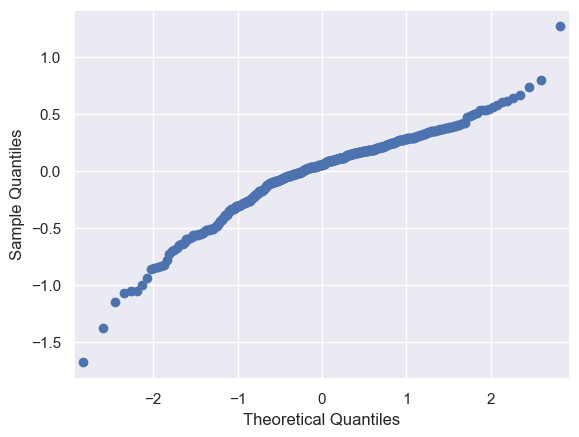

In [35]:
# qqplot to check for normality in errors
sm.qqplot(df_train["residual4"]);

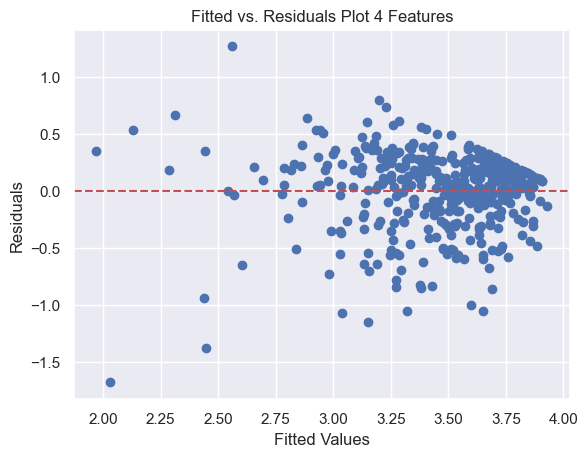

In [36]:
# fitted vs residual plot to check for equal variance in errors
plt.scatter(df_train["predicted_gpa4"], df_train["residual4"])
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted vs. Residuals Plot 4 Features')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

## selecting 3 features

In [37]:
# Set up cross-validation
xval_sbs3 = model_selection.KFold(10, shuffle=True, random_state = 42)

# Create the pipeline model
model_sbs3 = linear_model.LinearRegression()
pipe_sbs3 = pipeline.Pipeline([
    ('fs', feature_selection.SequentialFeatureSelector(model_sbs3, n_features_to_select=3, direction='backward', scoring="r2", cv=xval_sbs3)),
    ('model', model_sbs3)
])

# Train and test model
result3 = model_selection.cross_validate(pipe_sbs4, df_X, df_y, cv = xval_sbs3, scoring = "r2", return_train_score = True, return_estimator = True)

# Calculate mean R^2 for training and testing data
print(result3['train_score'].mean()) # train_r2
print(result3['test_score'].mean()) # test_r2

0.42608616456888937
0.3909783329007118


In [38]:
# fitting model
pipe_sbs3.fit(df_train[features_sbs], df_train["term_gpa"])

Pipeline(steps=[('fs',
                 SequentialFeatureSelector(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                                           direction='backward',
                                           estimator=LinearRegression(),
                                           n_features_to_select=3,
                                           scoring='r2')),
                ('model', LinearRegression())])

In [39]:
# predictions on training data
df_train["predicted_gpa3"] = pipe_sbs3.predict(df_train[features_sbs])
df_train["residual3"] = df_train["term_gpa"] - df_train["predicted_gpa3"]

# calculating r2 for training data
r2_train3 = r2_score(df_train["term_gpa"], df_train["predicted_gpa3"])
r2_train3

0.4754844767280333

In [40]:
# predictions on test data
df_test["predicted_gpa3"] = pipe_sbs3.predict(df_test[features_sbs])
df_test["residual3"] = df_test["term_gpa"] - df_test["predicted_gpa3"]

# calculating r2 for train data
r2_test3 = r2_score(df_test["term_gpa"], df_test["predicted_gpa3"])
r2_test3

0.3341097997555431

In [41]:
# calculating RMSEs
rmse_train3 = root_mean_squared_error(df_train["term_gpa"], df_train["predicted_gpa3"])
rmse_test3 = root_mean_squared_error(df_test["term_gpa"], df_test["predicted_gpa3"])
print("RMSE for 3 best features on training data", rmse_train3)
print("RMSE for 3 best features on test data", rmse_test3)

RMSE for 3 best features on training data 0.34121526317443457
RMSE for 3 best features on test data 0.38848967914478705


In [42]:
# calculating adj_r2 for training data
adj_r2_train3 = calc_adj_r2(3, df_train, "term_gpa", "predicted_gpa3")
adj_r2_train3

0.4717379372760907

In [43]:
# calculating adj_r2 for test data
adj_r2_test3 = calc_adj_r2(3, df_test, "term_gpa", "predicted_gpa3")
adj_r2_test3

0.31471493955424823

In [44]:
# printing features used for model
features_used = pipe_sbs3[:-1].get_feature_names_out()
features_used

array(['bedtime_mssd', 'cum_gpa', 'daytime_sleep'], dtype=object)

In [45]:
# displaying summary statistics from backward feature algorithm
model3 = smf.ols("term_gpa ~ daytime_sleep + bedtime_mssd + cum_gpa", data = df_train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               term_gpa   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     126.9
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           1.60e-58
Time:                        15:15:00   Log-Likelihood:                -145.73
No. Observations:                 424   AIC:                             299.5
Df Residuals:                     420   BIC:                             315.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2033      0.140      8.600      0.000       0.928       1.478
daytime_sleep    -0.0023      0.001     -3.691      0.000      -0.004      -0.001
bedtime_mssd     -0.0910      0.040     -2.269      0.024      -0.170      -0.012
cum_gpa           0.6844      0.038     17.874      0.000       0.609       0.760
==============================================================================
Omnibus:                       85.920   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.547
Skew:                          -1.024   Prob(JB):                     1.72e-44
Kurtosis:                       5.686   Cond. No.                         434.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### checking assumptions

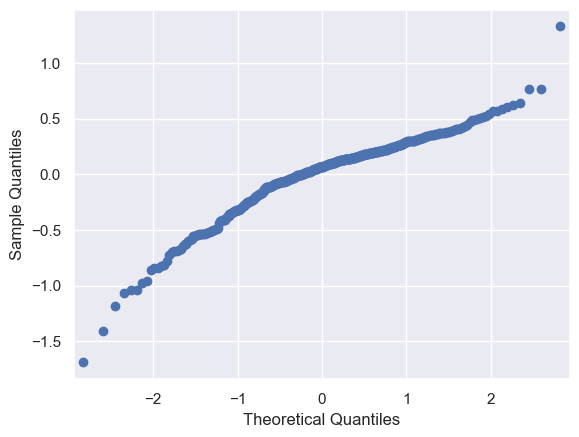

In [46]:
# qqplot to check for normality in errors
sm.qqplot(df_train["residual3"]);

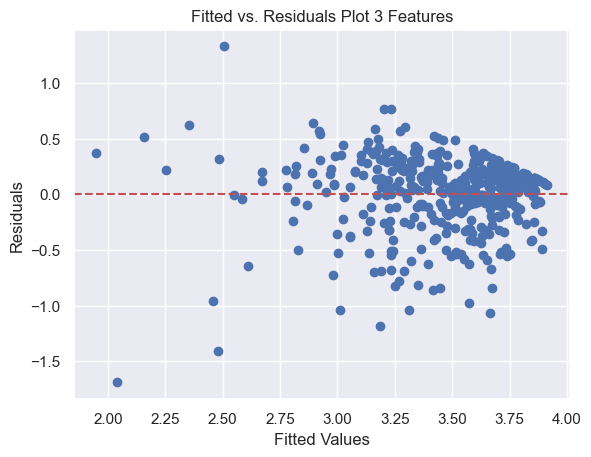

In [47]:
# fitted vs residual plot to check for equal variance in errors
plt.scatter(df_train["predicted_gpa3"], df_train["residual3"])
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted vs. Residuals Plot 3 Features')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

## selecting 2 features

In [48]:
xval_sbs2 = model_selection.KFold(10, shuffle=True, random_state = 42)

# Create the pipeline model
model_sbs2 = linear_model.LinearRegression()
pipe_sbs2 = pipeline.Pipeline([
    ('fs', feature_selection.SequentialFeatureSelector(model_sbs2, n_features_to_select=2, direction='backward', scoring="r2", cv=xval_sbs2)),
    ('model', model_sbs3)
])

# Train and test model
result2 = model_selection.cross_validate(pipe_sbs2, df_X, df_y, cv = xval_sbs2, scoring = "r2", return_train_score = True, return_estimator = True)

# Calculate mean R^2 for training and testing data
print(result2['train_score'].mean()) # train_r2
print(result2['test_score'].mean()) # test_r2

0.4246675264012647
0.3963940300785588


In [49]:
# fitting model
pipe_sbs2.fit(df_train[features_sbs], df_train["term_gpa"])

Pipeline(steps=[('fs',
                 SequentialFeatureSelector(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                                           direction='backward',
                                           estimator=LinearRegression(),
                                           n_features_to_select=2,
                                           scoring='r2')),
                ('model', LinearRegression())])

In [50]:
# predictions on training data
df_train["predicted_gpa2"] = pipe_sbs2.predict(df_train[features_sbs])
df_train["residual2"] = df_train["term_gpa"] - df_train["predicted_gpa2"]

# calculating r2 for training data
r2_train2 = r2_score(df_train["term_gpa"], df_train["predicted_gpa2"])
r2_train2

0.45846858820809855

In [51]:
# predictions on test data
df_test["predicted_gpa2"] = pipe_sbs2.predict(df_test[features_sbs])
df_test["residual2"] = df_test["term_gpa"] - df_test["predicted_gpa2"]

# calculating r2 for test data
r2_test2 = r2_score(df_test["term_gpa"], df_test["predicted_gpa2"])
r2_test2

0.3591931942932286

In [52]:
# calculating RMSEs
rmse_train2 = root_mean_squared_error(df_train["term_gpa"], df_train["predicted_gpa2"])
rmse_test2 = root_mean_squared_error(df_test["term_gpa"], df_test["predicted_gpa2"])
print("RMSE for 2 best features on training data", rmse_train2)
print("RMSE for 2 best features on test data", rmse_test2)

RMSE for 2 best features on training data 0.3467057971062264
RMSE for 2 best features on test data 0.3811024419483938


In [53]:
# calculating adj_r2 for training data
adj_r2_train2 = calc_adj_r2(2, df_train, "term_gpa", "predicted_gpa2")
adj_r2_train2

0.45589599242761447

In [54]:
# calculating adj_r2 for test data
adj_r2_train2 = calc_adj_r2(2, df_test, "term_gpa", "predicted_gpa2")
adj_r2_train2

0.3468699864911754

In [55]:
# priting features used for model
features_used = pipe_sbs2[:-1].get_feature_names_out()
features_used

array(['bedtime_mssd', 'cum_gpa'], dtype=object)

In [56]:
# displaying summary statistics from backward feature algorithm
model2 = smf.ols("term_gpa ~ bedtime_mssd + cum_gpa", data = df_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               term_gpa   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     178.2
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           8.47e-57
Time:                        15:15:06   Log-Likelihood:                -152.50
No. Observations:                 424   AIC:                             311.0
Df Residuals:                     421   BIC:                             323.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0711      0.137      7.804      0.000       0.801       1.341
bedtime_mssd    -0.1160      0.040     -2.893      0.004      -0.195      -0.037
cum_gpa          0.6968      0.039     17.998      0.000       0.621       0.773
==============================================================================
Omnibus:                      124.137   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.713
Skew:                          -1.267   Prob(JB):                    3.71e-103
Kurtosis:                       7.503   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### checking assumptions

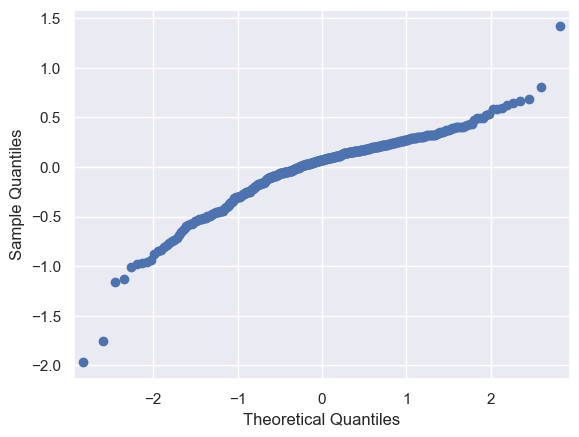

In [57]:
# qqplot to check for normality in errors
sm.qqplot(df_train["residual2"]);

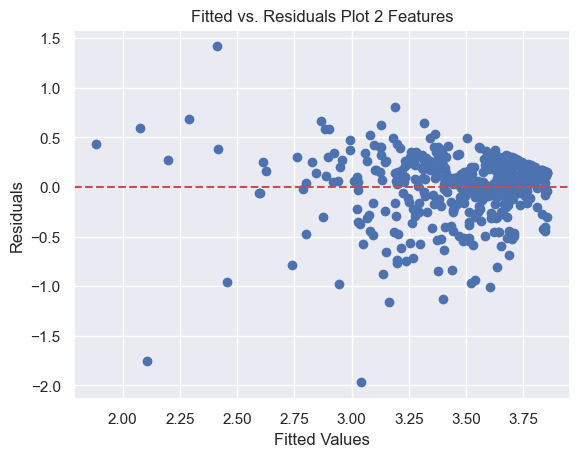

In [58]:
# fitted vs residual plot to check for equal variance in errors
plt.scatter(df_train["predicted_gpa2"], df_train["residual2"])
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted vs. Residuals Plot 2 Features')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

49, 38, 1654328571, 106 - random states

r2, r2 adjusted, RMSE for each random state

In [59]:
df_train

,bedtime_mssd,TotalSleepTime,midpoint_sleep,cum_gpa,daytime_sleep,term_gpa,predicted_gpa4,residual4,predicted_gpa3,residual3,predicted_gpa2,residual2
488,0.123336,399.107143,366.678571,3.553214,47.785714,3.540000,3.513445,0.026555,3.513696,0.026304,3.532540,0.007460
629,0.091325,383.448276,407.931035,3.722167,44.344828,3.611333,3.629631,-0.018298,3.640182,-0.028849,3.653972,-0.042639
201,0.102870,360.750000,374.964286,2.206364,51.571429,2.540000,2.569975,-0.029975,2.585005,-0.045005,2.596492,-0.056492
447,1.432683,368.666667,537.666667,2.900000,88.761905,3.266666,2.865119,0.401547,2.852965,0.413701,2.925490,0.341176
81,0.078486,414.720000,496.160000,3.770000,17.760000,3.250000,3.733646,-0.483646,3.735423,-0.485423,3.688790,-0.438790
...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.034797,437.620690,472.965517,3.410000,24.586207,3.190000,3.490450,-0.300450,3.477255,-0.287255,3.443028,-0.253028
125,0.075138,444.913044,347.391304,4.000000,30.521739,4.000000,3.880817,0.119183,3.863702,0.136298,3.849431,0.150569
325,0.073322,447.884615,315.096154,2.637931,36.269231,3.483333,2.943579,0.539754,2.918373,0.564960,2.900616,0.582717
519,0.788238,332.666667,465.166667,3.833333,39.833333,3.666667,3.631714,0.034953,3.663275,0.003392,3.650567,0.016100


In [60]:
df_test

,bedtime_mssd,TotalSleepTime,midpoint_sleep,cum_gpa,daytime_sleep,term_gpa,predicted_gpa4,residual4,predicted_gpa3,residual3,predicted_gpa2,residual2
618,0.061560,419.266667,328.433333,3.888833,19.766667,3.666667,3.814273,-0.147606,3.813666,-0.146999,3.773551,-0.106884
7,0.129622,422.111111,414.833333,3.860000,17.037037,3.280000,3.796244,-0.516244,3.794037,-0.514037,3.745564,-0.465564
384,0.069091,393.423077,364.192308,3.052727,34.461538,3.000000,3.200926,-0.200926,3.206825,-0.206825,3.190118,-0.190118
499,0.062219,412.500000,353.050000,3.761857,21.633333,3.714429,3.720387,-0.005958,3.722393,-0.007965,3.685004,0.029425
594,0.318043,390.931035,352.758621,3.500000,63.344828,3.857286,3.425858,0.431428,3.423665,0.433621,3.472871,0.384415
...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.267060,408.321429,411.410714,2.860000,22.678571,3.780000,3.085673,0.694327,3.084093,0.695907,3.032864,0.747136
354,0.061014,409.481481,308.444444,3.155455,36.814815,3.410000,3.275322,0.134678,3.272440,0.137560,3.262630,0.147370
155,0.089126,430.428571,319.642857,2.331817,71.071429,3.446153,2.654240,0.791913,2.627130,0.819023,2.685497,0.760656
504,0.080945,460.689655,448.137931,3.611167,72.241379,3.944500,3.539703,0.404797,3.500794,0.443706,3.577837,0.366663


In [86]:
sleep_model = smf.ols("term_gpa ~ bedtime_mssd + TotalSleepTime + midpoint_sleep + daytime_sleep", data = df_train).fit()
sleep_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               term_gpa   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     10.26
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           6.20e-08
Time:                        15:16:06   Log-Likelihood:                -262.72
No. Observations:                 424   AIC:                             535.4
Df Residuals:                     419   BIC:                             555.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4955      0.298     11.727      0.000       2.910       4.081
bedtime_mssd      -0.1276      0.060     -2.126      0.034      -0.246      -0.010
TotalSleepTime     0.0008      0.001      1.562      0.119      -0.000       0.002
midpoint_sleep    -0.0006      0.000     -1.415      0.158      -0.001       0.000
daytime_sleep     -0.0028      0.001     -3.248      0.001      -0.005      -0.001
==============================================================================
Omnibus:                      132.940   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              458.387
Skew:                          -1.404   Prob(JB):                    2.90e-100
Kurtosis:                       7.250   Cond. No.                     7.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Creating visualizations for metrics

In [61]:
df_metrics = pd.read_csv("metrics_summary.csv")
df_metrics

,Metric,4 Best Variables,3 Best Variables,2 Best Variables
0,R2 Training,0.477853,0.475484,0.458469
1,R2 Test,0.345783,0.334110,0.359193
2,R2 Adj. Training,0.472868,0.471738,0.455896
3,R2 Adj. Test,0.320127,0.314715,0.346870
4,RMSE training,0.340444,0.341215,0.346706
5,RMSE test,0.385070,0.388490,0.381102


### checking for multicolinearity

In [62]:
df_train[features_sbs].corr()

,bedtime_mssd,TotalSleepTime,midpoint_sleep,cum_gpa,daytime_sleep
bedtime_mssd,1.000000,-0.255757,0.489977,-0.152340,0.183389
TotalSleepTime,-0.255757,1.000000,-0.320158,0.126853,-0.351486
midpoint_sleep,0.489977,-0.320158,1.000000,-0.214414,0.097267
cum_gpa,-0.152340,0.126853,-0.214414,1.000000,-0.112678
daytime_sleep,0.183389,-0.351486,0.097267,-0.112678,1.000000


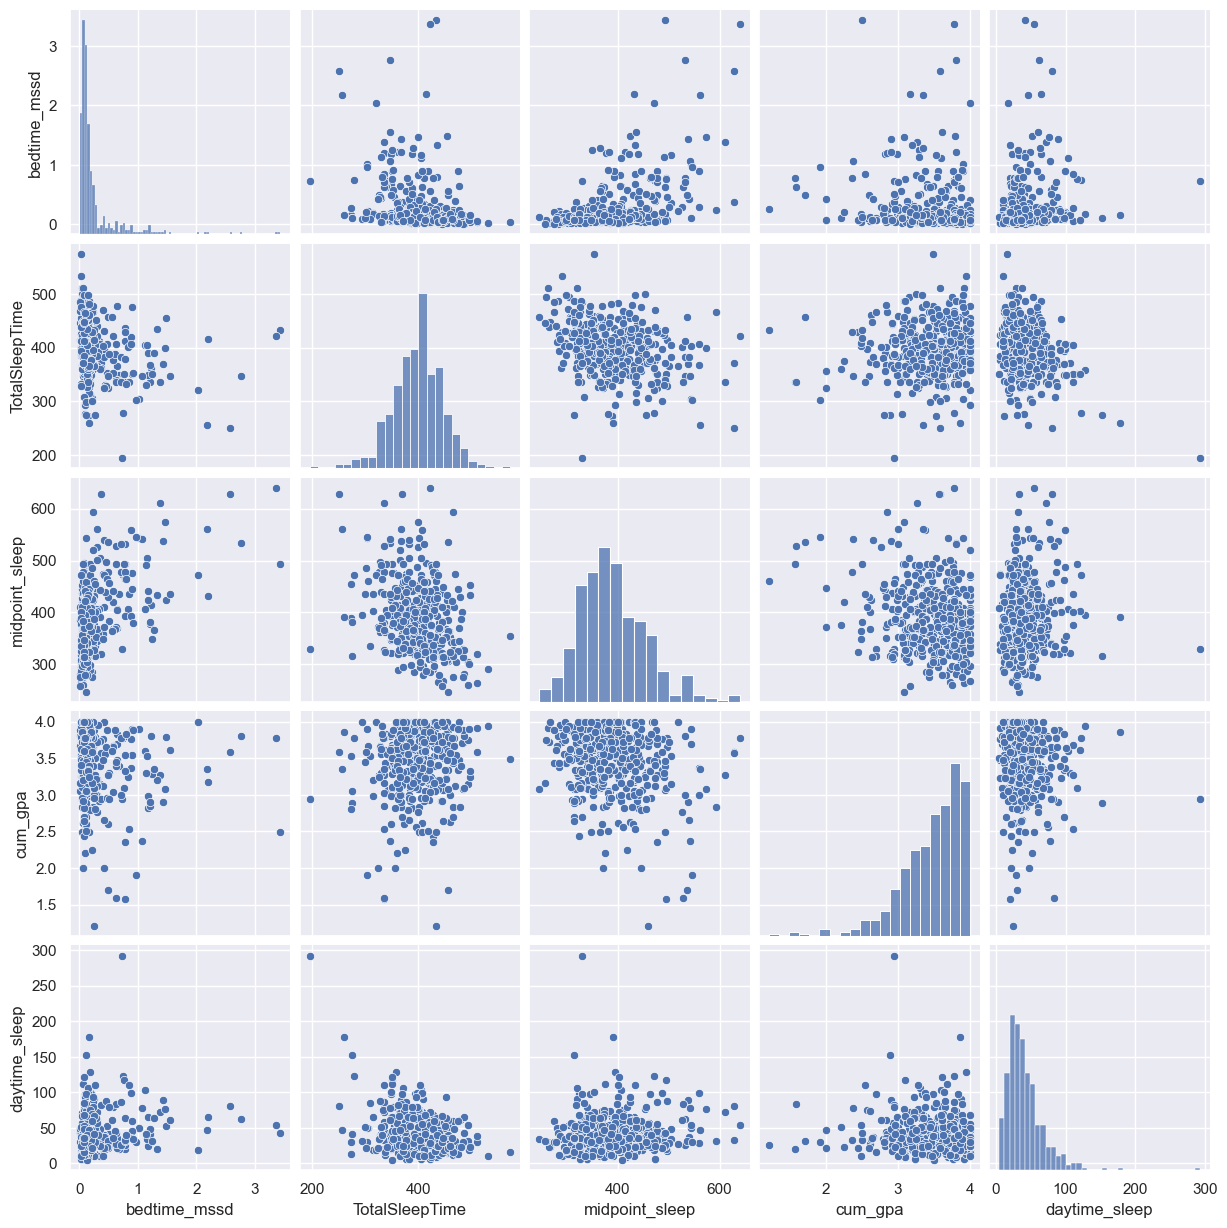

In [63]:
sns.pairplot(df_train[features_sbs])

# Creating Partial Regression Plots

### For Training Data
'bedtime_mssd', 'TotalSleepTime', 'cum_gpa', 'daytime_sleep'

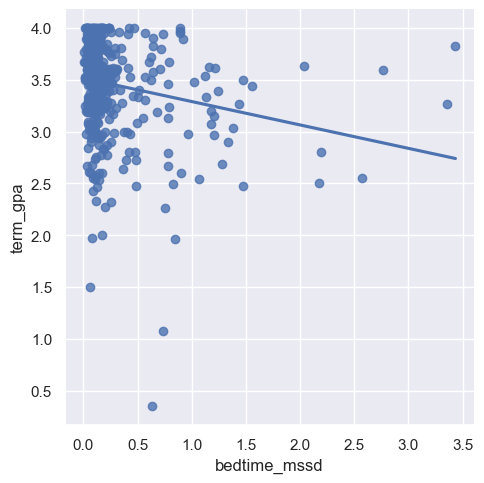

In [64]:
# plotting bedtime_mssd vs term_gpa
sns.lmplot(x = "bedtime_mssd", y = "term_gpa", data=df_train, ci=False)
plt.show()

In [65]:
# calculating correaltion coefficient for bedtime_mssd
stats.pearsonr(df_train["bedtime_mssd"], df_train["term_gpa"])

PearsonRResult(statistic=-0.20447556579899684, pvalue=2.206584382502626e-05)

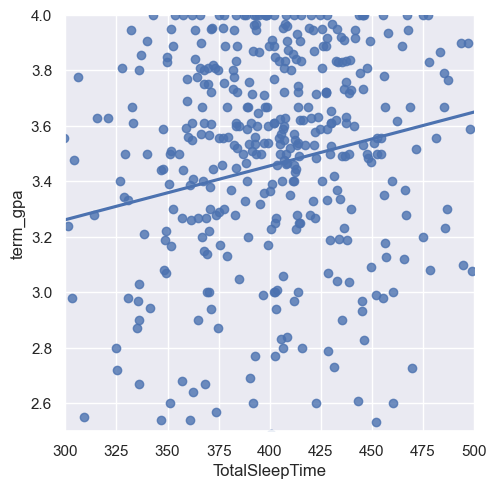

In [66]:
# plotting TotalSleepTime vs term_gpa
sns.lmplot(x = "TotalSleepTime", y = "term_gpa", data=df_train, ci=False)
plt.xlim(300, 500)
plt.ylim(2.5, 4)
plt.show()

In [67]:
# calculating correaltion coefficient for TotalSleepTime
stats.pearsonr(df_train["TotalSleepTime"], df_train["term_gpa"])

PearsonRResult(statistic=0.1937175568495918, pvalue=5.9392772425323075e-05)

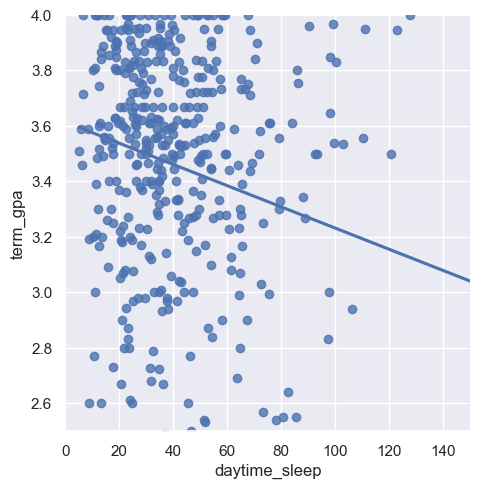

In [68]:
# plotting daytime_sleep vs term_gpa
sns.lmplot(x = "daytime_sleep", y = "term_gpa", data=df_train, ci=False)
plt.xlim(0, 150)
plt.ylim(2.5, 4)
plt.show()

In [69]:
# calculating correaltion coefficient for daytime_sleep
stats.pearsonr(df_train["daytime_sleep"], df_train["term_gpa"])

PearsonRResult(statistic=-0.22058796020021731, pvalue=4.531632209376332e-06)

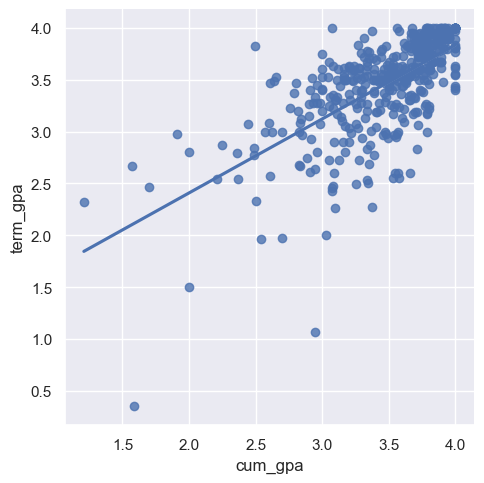

In [70]:
# plotting cum_gpa vs term_gpa
sns.lmplot(x = "cum_gpa", y = "term_gpa", data=df_train, ci=False)
plt.show()

In [71]:
# calculating correaltion coefficient for cum_gpa
stats.pearsonr(df_train["cum_gpa"], df_train["term_gpa"])

PearsonRResult(statistic=0.6691064837601816, pvalue=2.2942058503977454e-56)

### For testing data

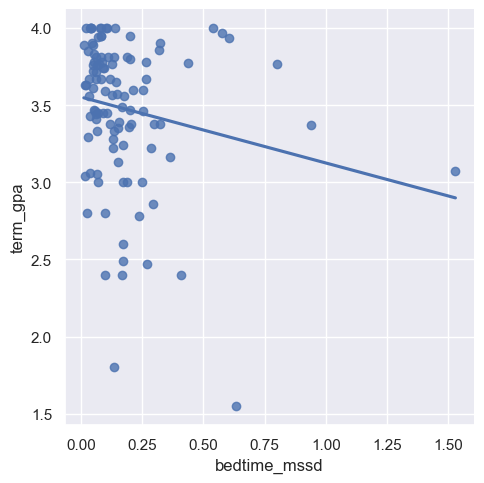

In [72]:
# plotting bedtime_mssd vs term_gpa
sns.lmplot(x = "bedtime_mssd", y = "term_gpa", data=df_test, ci=False)
plt.show()

In [73]:
# calculating correaltion coefficient for bedtime_mssd
stats.pearsonr(df_test["bedtime_mssd"], df_test["term_gpa"])

PearsonRResult(statistic=-0.18567625286522635, pvalue=0.055521012519984335)

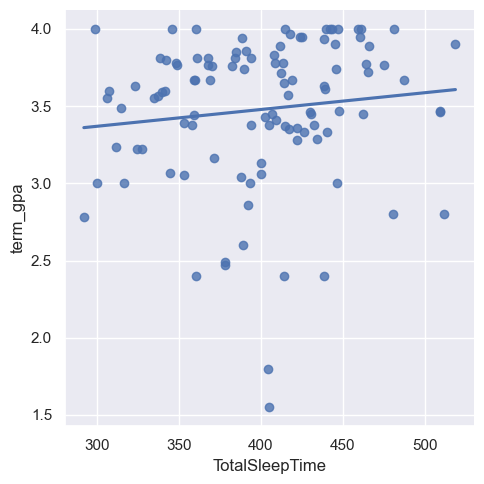

In [74]:
# plotting TotalSleepTime vs term_gpa
sns.lmplot(x = "TotalSleepTime", y = "term_gpa", data=df_test, ci=False)
plt.show()

In [75]:
# calculating correaltion coefficient for TotalSleepTime
stats.pearsonr(df_test["TotalSleepTime"], df_test["term_gpa"])

PearsonRResult(statistic=0.11733585112803871, pvalue=0.2287293921843562)

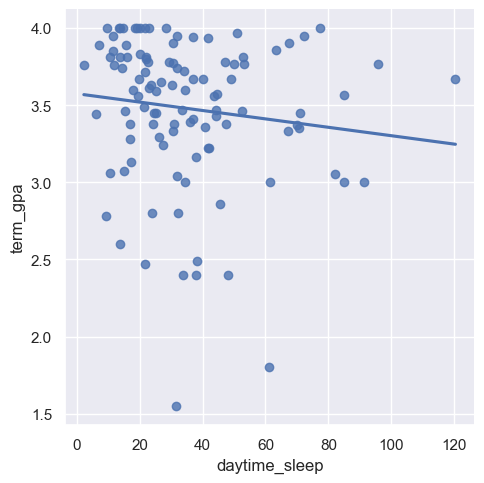

In [76]:
# plotting daytime_sleep vs daytime_sleep
sns.lmplot(x = "daytime_sleep", y = "term_gpa", data=df_test, ci=False)
plt.show()

In [77]:
# calculating correaltion coefficient for daytime_sleep
stats.pearsonr(df_test["daytime_sleep"], df_test["term_gpa"])

PearsonRResult(statistic=-0.12563111855829875, pvalue=0.19726258672299704)

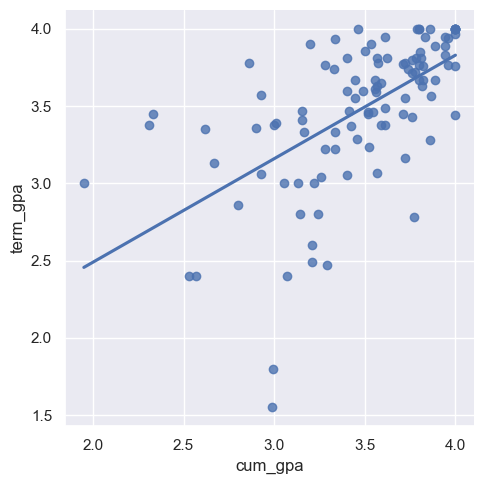

In [78]:
# plotting cum_gpa vs daytime_sleep
sns.lmplot(x = "cum_gpa", y = "term_gpa", data=df_test, ci=False)
plt.show()

In [79]:
# calculating correaltion coefficient for cum_gpa
stats.pearsonr(df_test["cum_gpa"], df_test["term_gpa"])

PearsonRResult(statistic=0.5918321391612705, pvalue=1.9033703765718944e-11)

## Predicting difference in gpa (cum - term) based on sleep

In [80]:
"""
# Set up cross-validation
xval_sbs = model_selection.KFold(10, shuffle=True, random_state = 42)

# Create the pipeline model
model_sbs = linear_model.LinearRegression()
pipe_sbs = pipeline.Pipeline([
    ('fs', feature_selection.SequentialFeatureSelector(model_sbs, n_features_to_select=3, direction='backward', scoring="r2", cv=xval_sbs)),
    ('model', model_sbs)
])

# Train and test model
df_X = df[["bedtime_mssd", "TotalSleepTime", "midpoint_sleep", "daytime_sleep"]]
df_y = df["diff_gpa"]
result = model_selection.cross_validate(pipe_sbs, df_X, df_y, cv = xval_sbs, scoring = "r2", return_train_score = True, return_estimator = True)

# Calculate mean R^2 for training and testing data
print(result['train_score'].mean()) # train_r2
print(result['test_score'].mean()) # test_r2
"""

'\n# Set up cross-validation\nxval_sbs = model_selection.KFold(10, shuffle=True, random_state = 42)\n\n# Create the pipeline model\nmodel_sbs = linear_model.LinearRegression()\npipe_sbs = pipeline.Pipeline([\n    (\'fs\', feature_selection.SequentialFeatureSelector(model_sbs, n_features_to_select=3, direction=\'backward\', scoring="r2", cv=xval_sbs)),\n    (\'model\', model_sbs)\n])\n\n# Train and test model\ndf_X = df[["bedtime_mssd", "TotalSleepTime", "midpoint_sleep", "daytime_sleep"]]\ndf_y = df["diff_gpa"]\nresult = model_selection.cross_validate(pipe_sbs, df_X, df_y, cv = xval_sbs, scoring = "r2", return_train_score = True, return_estimator = True)\n\n# Calculate mean R^2 for training and testing data\nprint(result[\'train_score\'].mean()) # train_r2\nprint(result[\'test_score\'].mean()) # test_r2\n'

In [81]:
"""
df_train_test = df[["bedtime_mssd", "TotalSleepTime", "midpoint_sleep", "daytime_sleep", "diff_gpa"]]
features_sbs = ["bedtime_mssd", "TotalSleepTime", "midpoint_sleep", "daytime_sleep"]

# making train/test split and fitting model
df_train, df_test = train_test_split(df_train_test, train_size = .80, random_state = 42)
pipe_sbs.fit(df_train[features_sbs], df_train["diff_gpa"])
"""

'\ndf_train_test = df[["bedtime_mssd", "TotalSleepTime", "midpoint_sleep", "daytime_sleep", "diff_gpa"]]\nfeatures_sbs = ["bedtime_mssd", "TotalSleepTime", "midpoint_sleep", "daytime_sleep"]\n\n# making train/test split and fitting model\ndf_train, df_test = train_test_split(df_train_test, train_size = .80, random_state = 42)\npipe_sbs.fit(df_train[features_sbs], df_train["diff_gpa"])\n'

In [82]:
"""
df_train["predicted_gpa_diff"] = pipe_sbs.predict(df_train[features_sbs])
df_train["residual"] = df_train["diff_gpa"] - df_train["predicted_gpa_diff"]
r2_train = r2_score(df_train["diff_gpa"], df_train["predicted_gpa_diff"])
r2_train
"""

'\ndf_train["predicted_gpa_diff"] = pipe_sbs.predict(df_train[features_sbs])\ndf_train["residual"] = df_train["diff_gpa"] - df_train["predicted_gpa_diff"]\nr2_train = r2_score(df_train["diff_gpa"], df_train["predicted_gpa_diff"])\nr2_train\n'

In [83]:
"""
df_test["predicted_gpa_diff"] = pipe_sbs.predict(df_test[features_sbs])
df_test["residual"] = df_test["diff_gpa"] - df_test["predicted_gpa_diff"]
r2_test = r2_score(df_test["diff_gpa"], df_test["predicted_gpa_diff"])
r2_test
"""

'\ndf_test["predicted_gpa_diff"] = pipe_sbs.predict(df_test[features_sbs])\ndf_test["residual"] = df_test["diff_gpa"] - df_test["predicted_gpa_diff"]\nr2_test = r2_score(df_test["diff_gpa"], df_test["predicted_gpa_diff"])\nr2_test\n'